In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2

# Đường dẫn đến thư mục cha
parent_directory = '/content/drive/MyDrive/Colab Notebooks/data'

# Kích thước mới của ảnh
new_size = (224, 224)

# Lặp qua tất cả các thư mục con
for folder_name in os.listdir(parent_directory):
    folder_path = os.path.join(parent_directory, folder_name)

    # Kiểm tra xem có phải là thư mục không
    if os.path.isdir(folder_path):
        # Lặp qua tất cả các tệp trong thư mục con
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)

            # Kiểm tra xem có phải là tệp ảnh không (có thể sử dụng các điều kiện phù hợp với định dạng ảnh của bạn)
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Đọc ảnh
                image = cv2.imread(file_path)

                # Thực hiện resize ảnh
                resized_image = cv2.resize(image, new_size)

                # Lưu đè lên ảnh gốc
                cv2.imwrite(file_path, resized_image)


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/data/train'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/data/test'
validation_data_dir='/content/drive/MyDrive/Colab Notebooks/data/validation'

In [ ]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/train')

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator



valid_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator

test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_dir,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')
validation_generator = valid_datagen.flow_from_directory(validation_data_dir,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')

Found 3179 images belonging to 530 classes.
Found 1060 images belonging to 530 classes.
Found 1060 images belonging to 530 classes.


In [ ]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [ ]:
type(train_generator)

keras.src.preprocessing.image.DirectoryIterator

In [ ]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 530)


In [ ]:
print(len(train_generator))
print(len(test_data_dir))
print(len(validation_data_dir))

100
48
54


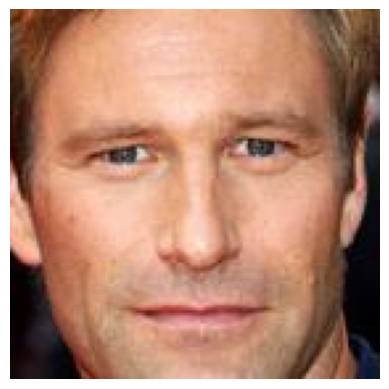

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/drive/MyDrive/Colab Notebooks/train/Aaron_Eckhart/Aaron_Eckhart_11_11.jpeg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D



In [ ]:
# VGG 19 Model
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        # self.add(Dense(1000, activation= 'relu'))
        self.add(Dense(530, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.003),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
model = VGG19((224, 224, 3))

In [ ]:
model.summary()

Model: "vgg19_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_120 (Conv2D)         (None, 224, 224, 64)      1792      
                                                                 
 conv2d_121 (Conv2D)         (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_122 (Conv2D)         (None, 112, 112, 128)     73856     
                                                                 
 conv2d_123 (Conv2D)         (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                     

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history =model.fit(train_generator, validation_data=validation_generator, epochs=45)

#Predict

In [ ]:
n_categories = len(os.listdir('/kaggle/input/birds-20-species-image-classification/train'))# number of categories print(n_categories)

In [ ]:
n_categories

20

In [ ]:
results =pd.DataFrame(history.history)
results.head()

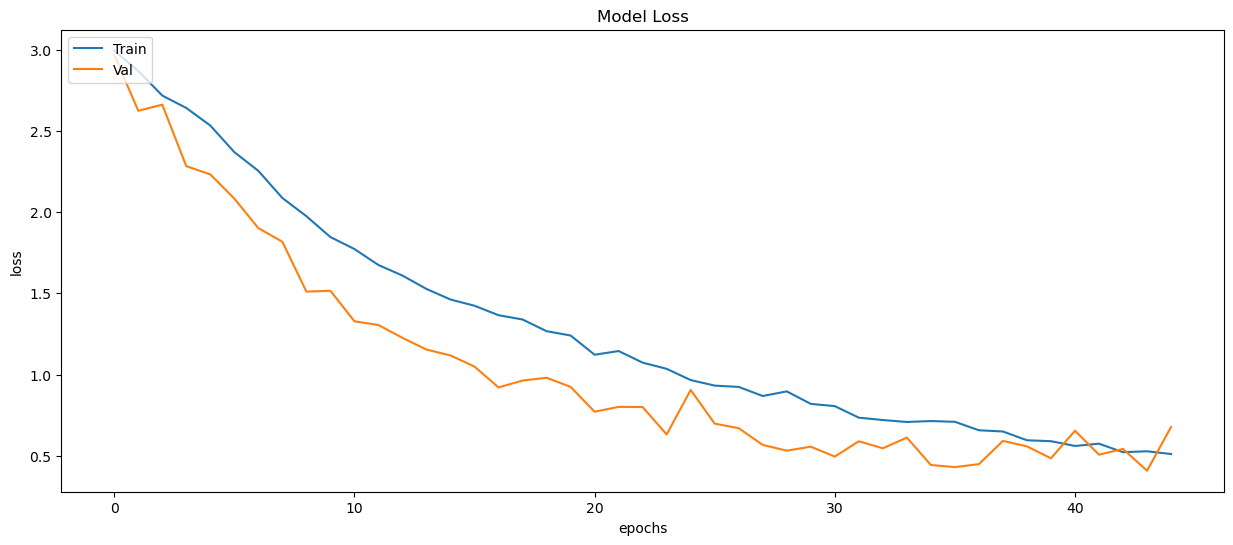

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

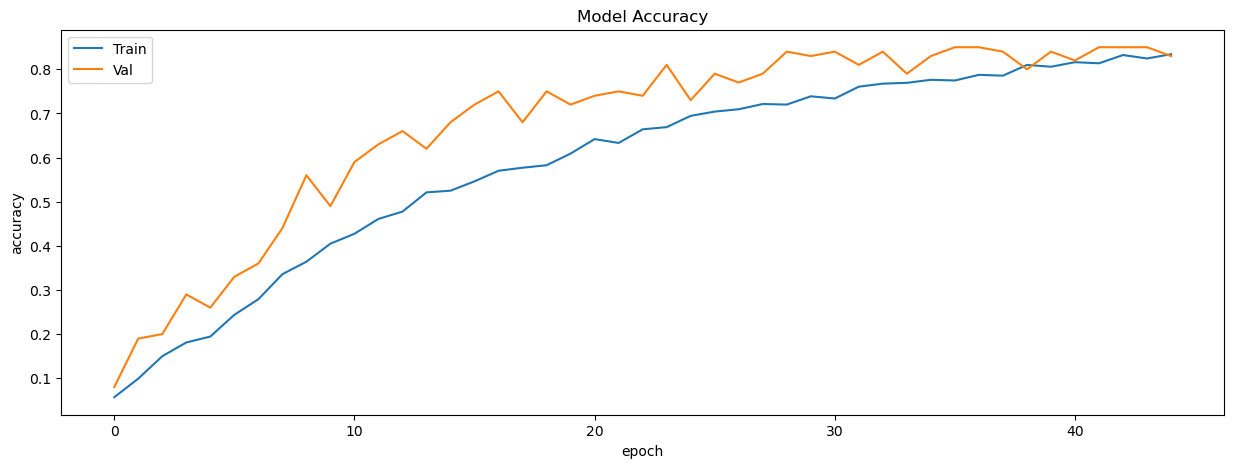

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

4/4 [==============================] - 1s 196ms/step


In [ ]:
results =model.evaluate(test_generator)

4/4 [==============================] - 0s 63ms/step - loss: 0.4976 - accuracy: 0.8600


1/1 [==============================] - 0s 24ms/step


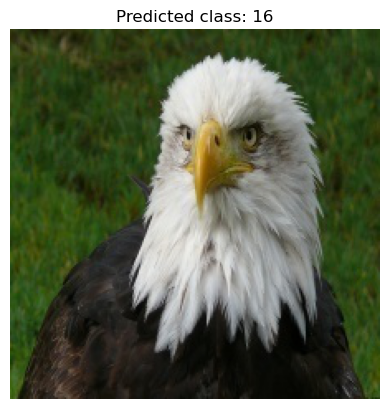

In [ ]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/birds-20-species-image-classification/images to predict'
img_size = 224

images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()


In [ ]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {test_ds[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : r
Class probability: 0.055224705
Predicted class for 2.jpg : r
Class probability: 0.05593458
Predicted class for 3.jpg : r
Class probability: 0.056043338
Predicted class for 4.jpg : r
Class probability: 0.055889327
Predicted class for 5.jpg : r
Class probability: 0.05578077
Predicted class for 6.jpg : r
Class probability: 0.056443598
